In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
plt.style.use('fivethirtyeight')

df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv', parse_dates=['Date'])
df['Total Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

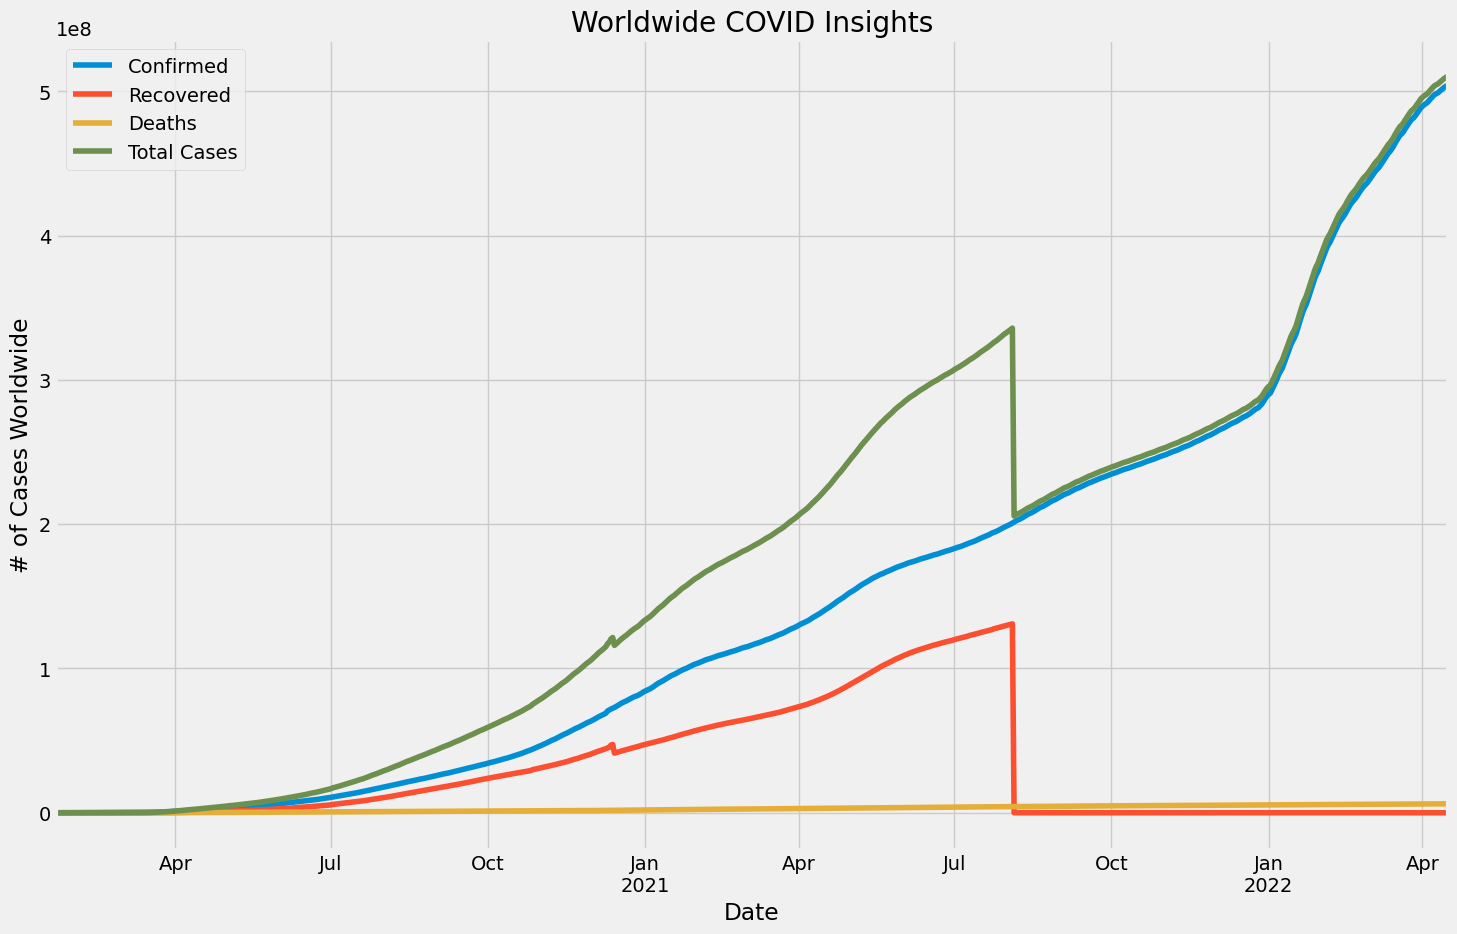

In [12]:
#Worldwide Cases

worldwide_df = df.groupby(['Date']).sum()
w = worldwide_df.plot(figsize=(16,10))
w.set_xlabel('Date')
w.set_ylabel('# of Cases Worldwide')
w.title.set_text('Worldwide COVID Insights')

plt.show()

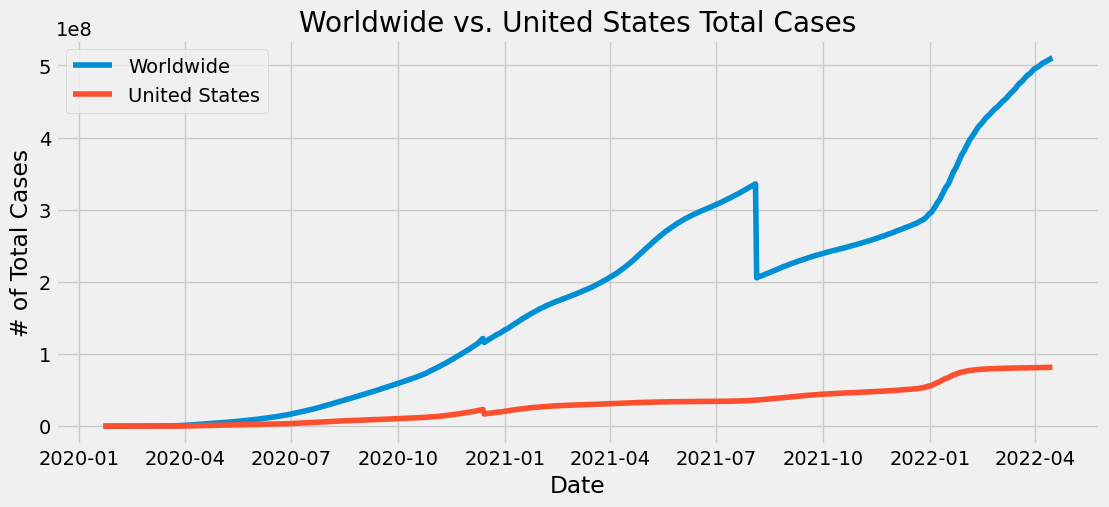

In [14]:
us_df = df[df['Country']=='US'].groupby(['Date']).sum()

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

ax.plot(worldwide_df[['Total Cases']], label='Worldwide')
ax.plot(us_df[['Total Cases']], label='United States')
ax.set_xlabel('Date')
ax.set_ylabel('# of Total Cases')
ax.title.set_text('Worldwide vs. United States Total Cases')

plt.legend(loc='upper left')
plt.show()

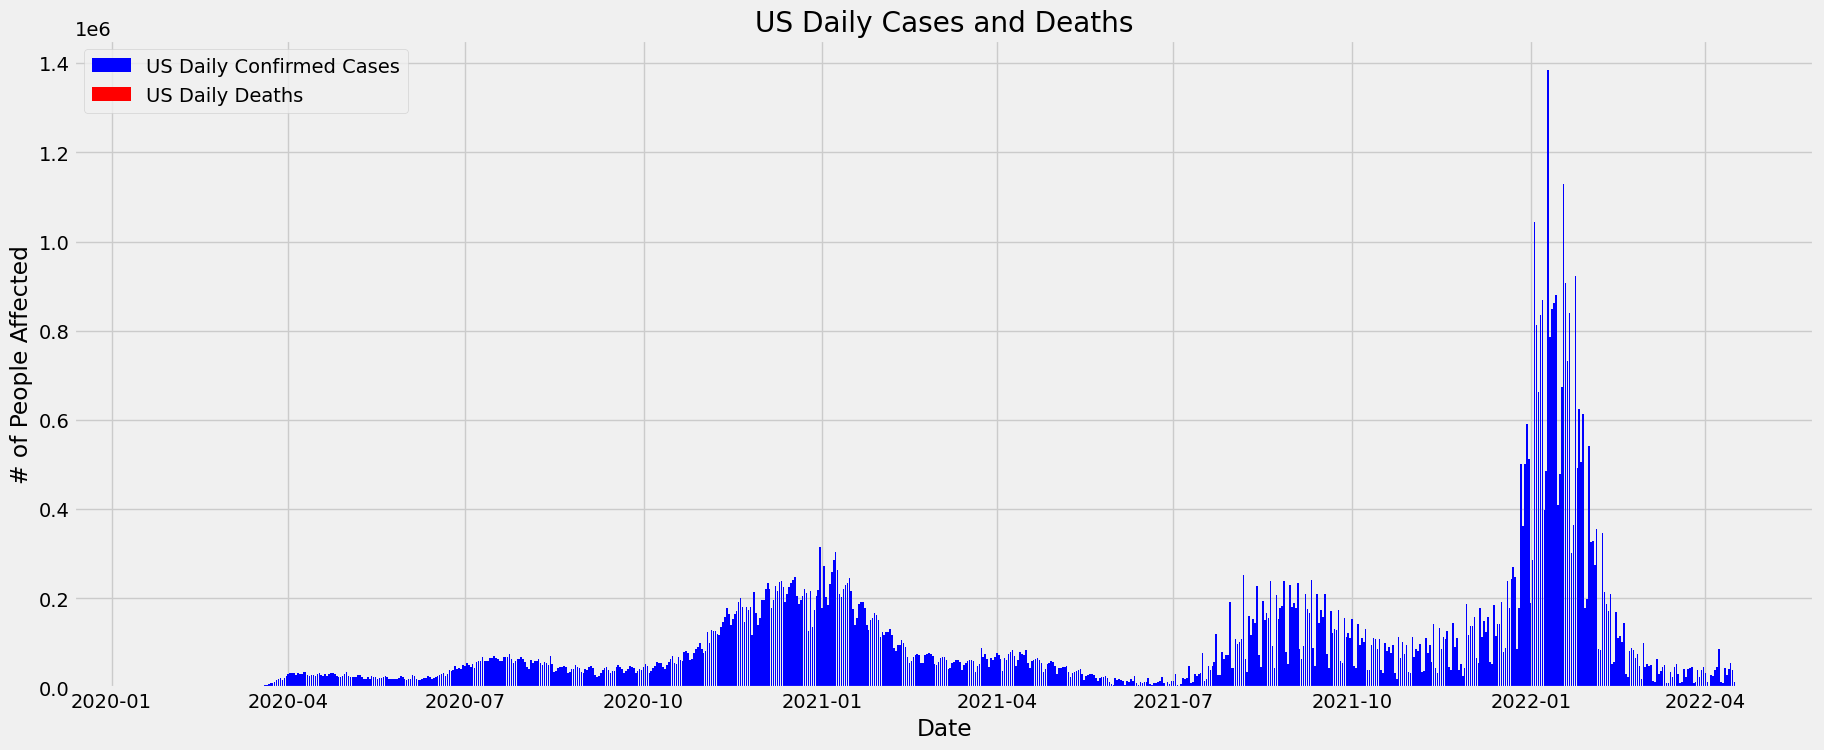

In [24]:
# United States Daily Cases and Deaths

us_df['Daily Confirmed'] = us_df['Confirmed'].sub(us_df['Confirmed'].shift())
us_df['Daily Deaths'] = us_df['Deaths'].sub(us_df['Deaths'].shift())

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

ax.bar(us_df['Date'], us_df['Daily Confirmed'], color='b', label='US Daily Confirmed Cases')
ax.bar(us_df['Date'], us_df['Daily Deaths'], color='r', label='US Daily Deaths')
ax.set_xlabel('Date')
ax.set_ylabel('# of People Affected')
ax.title.set_text('US Daily Cases and Deaths')


plt.legend(loc='upper left')
plt.show()

C:\Users\ianko\AppData\Local\Temp\ipykernel_29496\3862406477.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  top_10.loc['rest-of-world'] = today_df.sort_values(['Confirmed'], ascending=False)[10:].sum()


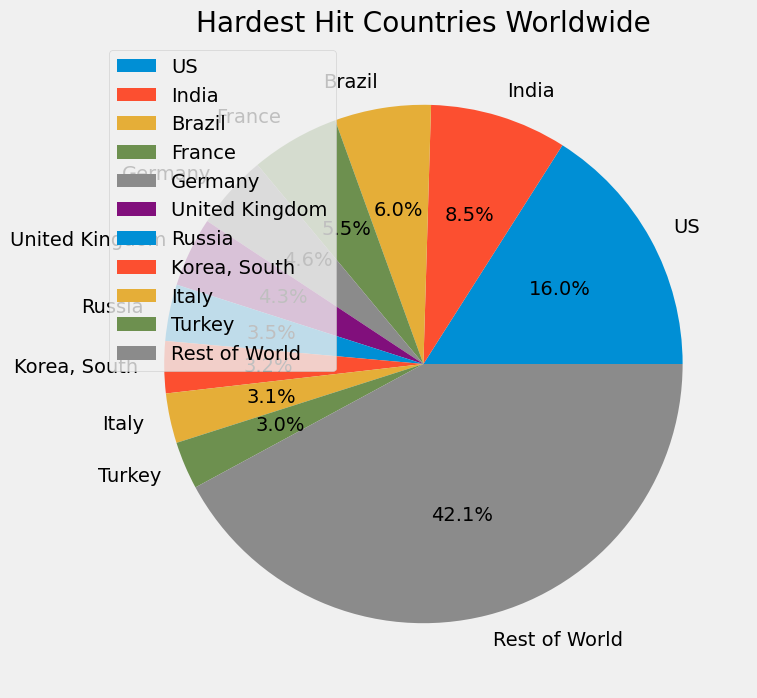

In [39]:
from datetime import date, timedelta
yesterday = '2022-04-16'

today_df = df[df['Date']==yesterday]
top_10 = today_df.sort_values(['Confirmed'], ascending=False)[:10]
top_10.loc['rest-of-world'] = today_df.sort_values(['Confirmed'], ascending=False)[10:].sum()
top_10.loc['rest-of-world', 'Country'] = 'Rest of World'

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.pie(top_10['Confirmed'], labels=top_10['Country'], autopct='%1.1f%%')
ax.title.set_text('Hardest Hit Countries Worldwide')

plt.legend(loc='upper left')
plt.show()